In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as spa
import math

In [2]:
np.random.seed(421)
# mean parameters
class_means = np.array([[+2.5, +2.5], 
                        [-2.5, +2.5], 
                        [-2.5, -2.5],
                        [+2.5, -2.5],
                        [+0.0, +0.0]])
# covariance parameters
class_covariances = np.array([[[+0.8, -0.6], 
                               [-0.6, +0.8]],
                              [[+0.8, +0.6], 
                               [+0.6, +0.8]],
                              [[+0.8, -0.6], 
                               [-0.6, +0.8]],
                              [[+0.8, +0.6], 
                               [+0.6, +0.8]],
                              [[+1.6, +0.0], 
                               [+0.0, +1.6]],])
# sample sizes
class_sizes = np.array([50, 50, 50, 50, 100])


In [3]:
# generate random samples
X1 = np.random.multivariate_normal(class_means[0,:], class_covariances[0,:,:], class_sizes[0])
X2 = np.random.multivariate_normal(class_means[1,:], class_covariances[1,:,:], class_sizes[1])
X3 = np.random.multivariate_normal(class_means[2,:], class_covariances[2,:,:], class_sizes[2])
X4 = np.random.multivariate_normal(class_means[3,:], class_covariances[3,:,:], class_sizes[3])
X5 = np.random.multivariate_normal(class_means[4,:], class_covariances[4,:,:], class_sizes[4])
X = np.vstack((X1, X2, X3, X4, X5))

np.random.seed(421)
# sample size
N = 300
# cluster count
K = 5

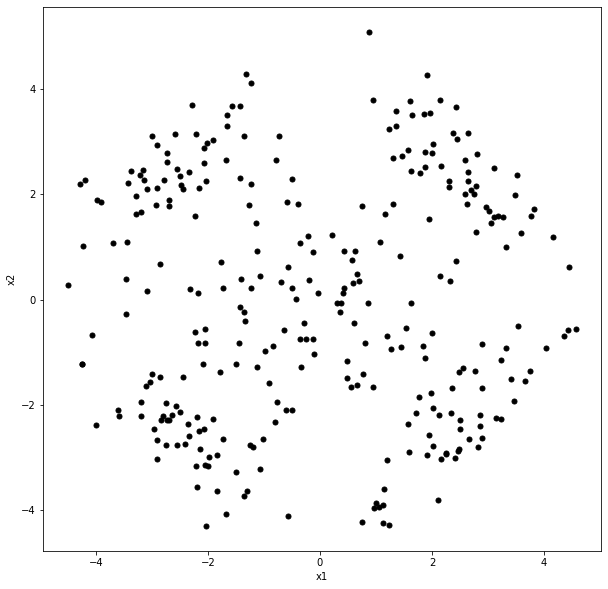

In [4]:
# plot data points generated
plt.figure(figsize = (10, 10))
plt.plot(X1[:,0], X1[:,1], "k.", markersize = 10)
plt.plot(X2[:,0], X2[:,1], "k.", markersize = 10)
plt.plot(X3[:,0], X3[:,1], "k.", markersize = 10)
plt.plot(X4[:,0], X4[:,1], "k.", markersize = 10)
plt.plot(X5[:,0], X5[:,1], "k.", markersize = 10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [5]:
#initializing values with 2 iterations on k-means clustering
def update_centroids(memberships, X):
    if memberships is None:
        # initialize centroids
        centroids = X[np.random.choice(range(N), K),:]
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

In [6]:
def plot_current_state(centroids, memberships, X):
    cluster_colors = np.array(["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00"])
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    if memberships is None:
        plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
    else:
        for c in range(K):
            plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10, 
                     color = cluster_colors[c])
    for c in range(K):
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
                 markerfacecolor = cluster_colors[c], markeredgecolor = "black")
    plt.xlabel("x1")
    plt.ylabel("x2")

K-means clustering
Iteration#1:


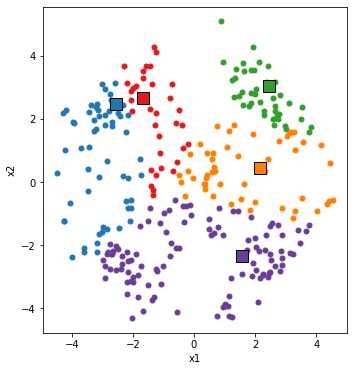

Iteration#2:


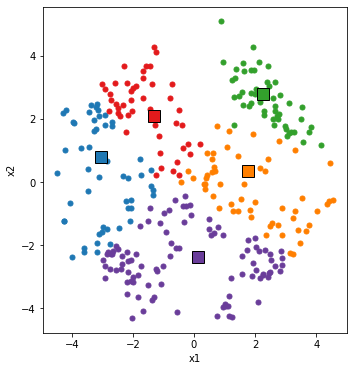

In [7]:
centroids = None
memberships = None
iteration = 1
print("K-means clustering")
for i in range(2):
    print("Iteration#{}:".format(iteration))

    old_centroids = centroids
    centroids = update_centroids(memberships, X)

    old_memberships = memberships
    memberships = update_memberships(centroids, X)
    
    
    plt.figure(figsize = (12, 6))    
    plt.subplot(1, 2, 2)
    plot_current_state(centroids, memberships, X)
    plt.show()

    iteration = iteration + 1

In [8]:
#initialize means,priors and covariances
means = centroids 

priors = np.asarray([memberships[memberships == c].size/N for c in range(K)])

covariances = [np.matmul((X[memberships == c] - means[c]).T,
                          X[memberships == c ] -means[c])
                         /X[memberships == c].shape[0] for c in range(K)]
covariances

[array([[ 0.68518307, -0.19374831],
        [-0.19374831,  2.61814891]]),
 array([[ 0.63311319, -0.49775475],
        [-0.49775475,  0.73116753]]),
 array([[ 0.78237246, -0.47958534],
        [-0.47958534,  1.10017697]]),
 array([[ 1.89348051, -0.75341909],
        [-0.75341909,  1.41721351]]),
 array([[ 3.57285041, -0.04747634],
        [-0.04747634,  0.87576298]])]

In [9]:
def estimate(x,cov,mean,prior):
    sq = 1/(2*np.linalg.det(cov))**1/2 
    ex = np.exp(-1/2*np.dot(np.dot(x-mean,np.linalg.inv(cov)),(x-mean).T))
    return ex * sq
def update_means(A,h):
    h = h.reshape (300,5,1)
    return np.asarray([np.sum(h[:,k,:] * A,axis = 0) / np.sum(h[:,k,:]) for k in range(K)])   

def update_priors(A,h):
    return [np.sum(h[:,c]) / N for c in range(K)]

def update_covariances(A,h):
    return [np.matmul(h[:,c]*(X - update_means(X,h)[c]).T, (X - update_means(X,h)[c]))
             /np.sum(h[:,c])  for c in range(K)]  

def update_memberships2(X,h):
    sample_covariances = update_covariances(X,h)
    sample_means = update_means(X,h)
    class_priors = update_priors(X,h)
    W =  [-1/2* np.linalg.inv(sample_covariances[c]) for c in range(K)]
    w = [np.matmul(np.linalg.inv(sample_covariances[c]), sample_means[c]) for c in range(K)]
    w0 = [-1/2*(np.matmul(np.matmul(sample_means[c].T,np.linalg.inv(sample_covariances[c])),
                           sample_means[c]) + np.log(np.linalg.det(sample_covariances[c])))
            + np.log(class_priors[c]) for c in range(K)]
    a = np.asarray([np.matmul(np.matmul(X[i].T,W[c]),X[i]) + np.matmul(w[c].T,X[i]) + w0[c] for i in range(N) for c in range(K)])
    a = a.reshape(300,5)
    return np.argmax(a, axis = 1)

In [10]:
h = np.zeros((N,K))
for iteration in range(100):
    for i in range(N):
        for k in range(K):
            denom = sum([estimate(X[i],covariances[m],means[m],priors[m])*priors[m] for m in range(K)])
            h[i,k] = estimate(X[i],covariances[k],means[k],priors[k])*priors[k]/denom
   
    print("Iteration#{}".format(iteration))

    means = update_means(X,h)
    priors =  update_priors(X,h)
    covariances = update_covariances(X,h)
    memberships = update_memberships2(X,h) 

    

Iteration#0
Iteration#1
Iteration#2
Iteration#3
Iteration#4
Iteration#5
Iteration#6
Iteration#7
Iteration#8
Iteration#9
Iteration#10
Iteration#11
Iteration#12
Iteration#13
Iteration#14
Iteration#15
Iteration#16
Iteration#17
Iteration#18
Iteration#19
Iteration#20
Iteration#21
Iteration#22
Iteration#23
Iteration#24
Iteration#25
Iteration#26
Iteration#27
Iteration#28
Iteration#29
Iteration#30
Iteration#31
Iteration#32
Iteration#33
Iteration#34
Iteration#35
Iteration#36
Iteration#37
Iteration#38
Iteration#39
Iteration#40
Iteration#41
Iteration#42
Iteration#43
Iteration#44
Iteration#45
Iteration#46
Iteration#47
Iteration#48
Iteration#49
Iteration#50
Iteration#51
Iteration#52
Iteration#53
Iteration#54
Iteration#55
Iteration#56
Iteration#57
Iteration#58
Iteration#59
Iteration#60
Iteration#61
Iteration#62
Iteration#63
Iteration#64
Iteration#65
Iteration#66
Iteration#67
Iteration#68
Iteration#69
Iteration#70
Iteration#71
Iteration#72
Iteration#73
Iteration#74
Iteration#75
Iteration#76
Iteration

In [12]:
cluster_colors = np.array(["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00"])
cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])

x1_interval = np.linspace(-5, +5, 150)
x2_interval = np.linspace(-5, +5, 150)
z_real = np.zeros((5,150,150))
z_estimated = np.zeros((5,150,150))
for k in range(K):
    for i in range(150):
        for j in range(150):
            z_real[k][i][j] = estimate(np.array([x1_interval[i],x2_interval[j]]),
                                       class_covariances[k],class_means[k],class_sizes[k]/N)
            z_estimated[k][i][j] = estimate(np.array([x1_interval[i],x2_interval[j]]),
                                       covariances[k],means[k],priors[k])
z_real = np.zeros((5,150,150))
z_estimated = np.zeros((5,150,150))       





ValueError: operands could not be broadcast together with shapes (2,150) (2,) 

In [19]:
class_covariances.shape

(5, 2, 2)

array([[[ 2.5],
        [ 2.5]],

       [[-2.5],
        [ 2.5]],

       [[-2.5],
        [-2.5]],

       [[ 2.5],
        [-2.5]],

       [[ 0. ],
        [ 0. ]]])

In [22]:
[estimate(np.array([x1_interval,x2_interval]),class_covariances[k],
          class_means.reshape(5,2,1)[k],class_sizes.reshape(5,1)[k]/N) for k in range(K)]

ValueError: shapes (2,150) and (2,2) not aligned: 150 (dim 1) != 2 (dim 0)

In [ ]:
print("EM Clustering")
print("Iteration#{}".format(100))

plt.figure(figsize = (12, 6)) 

plt.subplot(1, 2, 1)

for c in range(K):
    plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,color = cluster_colors[c])

    plt.contour(x1_interval,x2_interval,z_real[c],levels = [0.05],colors = "k",linestyles='dashed') 
    plt.contour(x1_interval,x2_interval,z_estimated[c],levels = [0.05],colors = "k") 
plt.xticks(np.array([-6,-4,-2,0,2,4,6]))
plt.yticks(np.array([-6,-4,-2,0,2,4,6]))
plt.show()
print("means")
print(means)

